In [ ]:
import pandas as pd

# Load the IMDb dataset with encoding
file_path = '/content/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Check structure and sample data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Drop rows with missing target (Rating)
df = df[df['Rating'].notna()]

# Clean 'Year' column: extract only numeric year
df['Year'] = df['Year'].str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean 'Duration': remove 'min' and convert to numeric
df['Duration'] = df['Duration'].str.replace('min', '', regex=False).str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Clean 'Votes': remove commas and convert to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Drop irrelevant columns if they exist
irrelevant_cols = ['Poster_Link', 'Overview', 'Certificate']  # adjust based on your dataset
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])

# Drop rows with missing numeric values
df.dropna(subset=['Year', 'Duration', 'Votes'], inplace=True)

# Display cleaned info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   float64
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 502.8+ KB


/tmp/ipython-input-7-1343882815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].str.extract(r'(\d{4})')
/tmp/ipython-input-7-1343882815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
/tmp/ipython-input-7-1343882815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


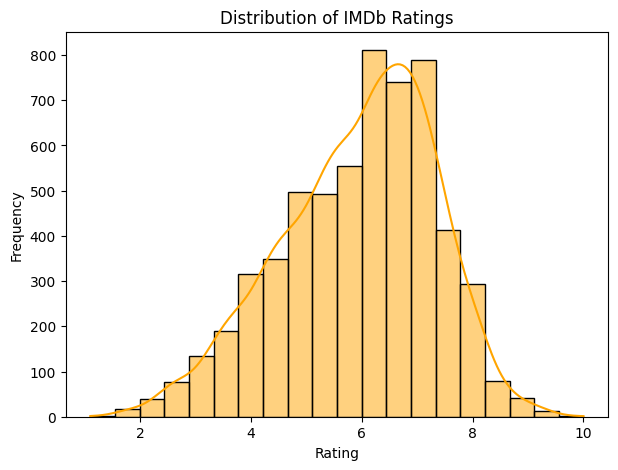

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-12-3343522958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


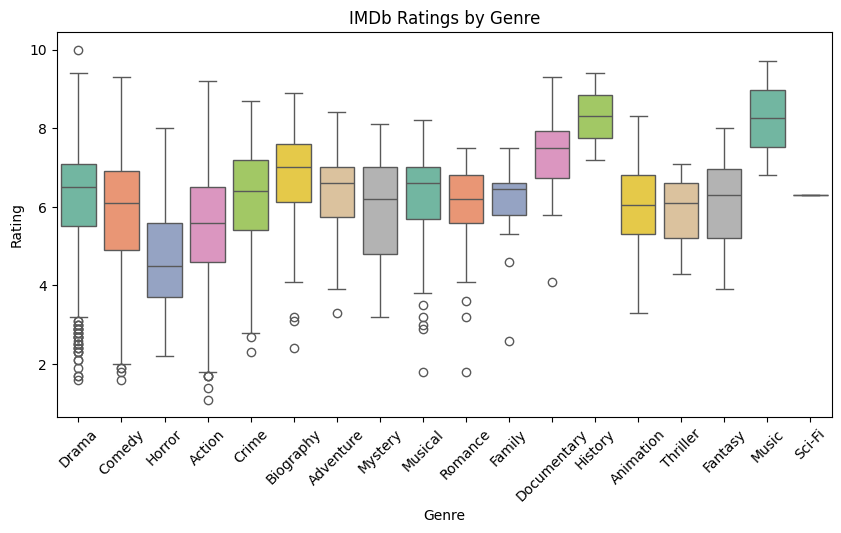

In [ ]:
# Clean Genre column by removing NaN
df_genre_clean = df[df['Genre'].notna()].copy()

# Find top 10 genres by frequency
top_genres = df_genre_clean['Genre'].str.split(',').explode().value_counts().head(10).index

# Filter movies containing any of the top genres
genre_data = df_genre_clean[df_genre_clean['Genre'].str.contains('|'.join(top_genres))]

# Plot boxplot of Ratings for top genres
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=genre_data,
    x=genre_data['Genre'].str.split(',').str[0],  # Use first genre listed
    y='Rating',
    palette="Set2"
)
plt.title("IMDb Ratings by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()


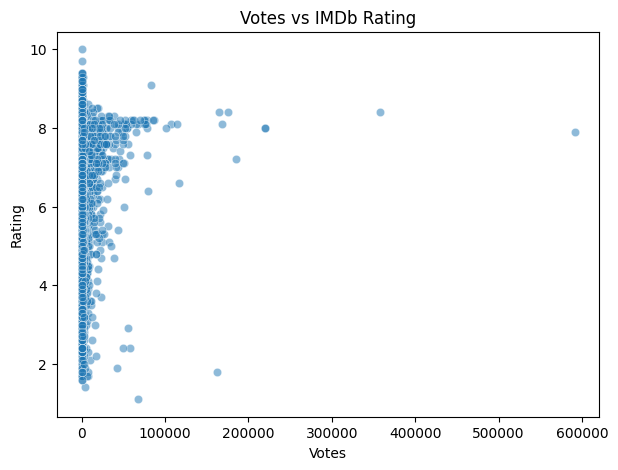

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Votes', y='Rating', alpha=0.5)
plt.title("Votes vs IMDb Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()


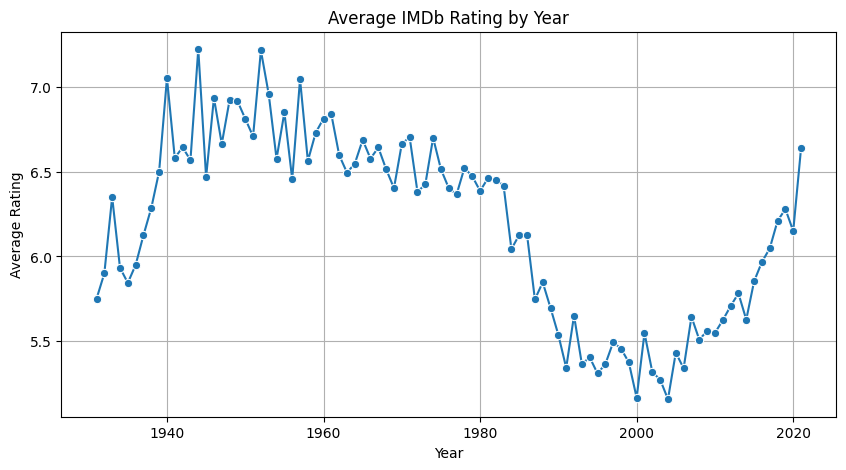

In [ ]:
# Group by Year and calculate average rating
year_rating = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=year_rating, x='Year', y='Rating', marker='o')
plt.title("Average IMDb Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()


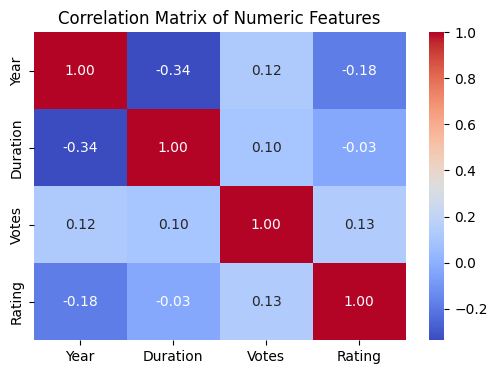

In [ ]:
# Pick relevant numerical columns for correlation
numeric_cols = ['Year', 'Duration', 'Votes', 'Rating']

plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
#Handle Missing Values

# Show missing value count
df.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,31
Rating,0
Votes,0
Director,1
Actor 1,75
Actor 2,117
Actor 3,163


In [ ]:
df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [ ]:
df.rename(columns={
    'Actor 1': 'Actor1',
    'Actor 2': 'Actor2',
    'Actor 3': 'Actor3'
}, inplace=True)


In [ ]:
# function to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]


In [ ]:
df = remove_outliers_iqr(df, 'Rating')
df = remove_outliers_iqr(df, 'Votes')
df = remove_outliers_iqr(df, 'Duration')


In [ ]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()

df['Genre'] = le_genre.fit_transform(df['Genre'].astype(str))
df['Director'] = le_director.fit_transform(df['Director'].astype(str))
df['Actor1'] = le_actor1.fit_transform(df['Actor1'].astype(str))


In [ ]:
#Feature Selection
X = df[['Genre', 'Director', 'Actor1', 'Votes', 'Duration', 'Year']]
y = df['Rating']


In [ ]:
#Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train the Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1.56
Root Mean Squared Error: 1.25
R² Score: 0.14


In [ ]:
# Without using print() on the sliced part
le_director.classes_[:10]
print(le_director.classes_[:10])


['A. Bhimsingh' 'A. Jagannathan' 'A. Majid' 'A. Muthu' 'A. Salaam'
 'A. Shamsheer' 'A. Veerappan' 'A.C. Trilogchander' 'A.K. Bir'
 'A.L. Vijay']


In [ ]:
le_genre.classes_[:10]
le_actor1.classes_[:10]


array(['A. Muthu', 'A. Nairang', 'A.K. Hangal', 'A.S. Ravindra Babu',
       'Aachi Manorama', 'Aadhi', 'Aadil Abedi', 'Aadil Chahal',
       'Aakar Kaushik', 'Aakash'], dtype=object)

In [ ]:
print("Some valid Genre values:", le_genre.classes_[:10])
print("Some valid Director values:", le_director.classes_[:10])
print("Some valid Actor1 values:", le_actor1.classes_[:10])


Some valid Genre values: ['Action' 'Action, Adventure' 'Action, Adventure, Biography'
 'Action, Adventure, Comedy' 'Action, Adventure, Crime'
 'Action, Adventure, Drama' 'Action, Adventure, Family'
 'Action, Adventure, Fantasy' 'Action, Adventure, History'
 'Action, Adventure, Horror']
Some valid Director values: ['A. Bhimsingh' 'A. Jagannathan' 'A. Majid' 'A. Muthu' 'A. Salaam'
 'A. Shamsheer' 'A. Veerappan' 'A.C. Trilogchander' 'A.K. Bir'
 'A.L. Vijay']
Some valid Actor1 values: ['A. Muthu' 'A. Nairang' 'A.K. Hangal' 'A.S. Ravindra Babu'
 'Aachi Manorama' 'Aadhi' 'Aadil Abedi' 'Aadil Chahal' 'Aakar Kaushik'
 'Aakash']


In [ ]:
import pandas as pd


In [ ]:
def create_sample_input(columns, genre, director, actor1):
    row = pd.DataFrame(0, index=[0], columns=columns)
    genre_col = f"Genre_{genre}"
    director_col = f"Director_{director}"
    actor_col = f"Actor 1_{actor1}"

    for col in [genre_col, director_col, actor_col]:
        if col in row.columns:
            row[col] = 1
        else:
            print(f"Warning: '{col}' not found in training features.")
    return row

sample_input = create_sample_input(model.feature_names_in_, "Action", "Christopher Nolan", "Leonardo DiCaprio")
rating = model.predict(sample_input)[0]
print("Predicted Movie Rating:", round(rating, 2))


Predicted Movie Rating: 55.27
